#### 7- HuggingFace Transformers model 125 Random samples/instances with Pre-processing


##### 1- load the Definition+PrefLabel data

In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
import pandas as pd
prefLabelPlusDefinition=pd.read_csv("/content/drive/MyDrive/Thematic Annotation of Government data/Datasets/PrefLabel_plus_definition.csv")

In [ ]:
prefLabelPlusDefinition

,s,preflabel,definition,prefLabel_plus_definition
0,http://publications.europa.eu/resource/authori...,Economy and finance,This concept identifies datasets covering such...,Economy and finance This concept identifies da...
1,http://publications.europa.eu/resource/authori...,"Education, culture and sport",This concept identifies datasets covering such...,"Education, culture and sport This concept iden..."
2,http://publications.europa.eu/resource/authori...,Education,This concept identifies datasets covering such...,Education This concept identifies datasets cov...
3,http://publications.europa.eu/resource/authori...,Energy,This concept identifies datasets covering the ...,Energy This concept identifies datasets coveri...
4,http://publications.europa.eu/resource/authori...,Environment,This concept identifies datasets covering the ...,Environment This concept identifies datasets c...
5,http://publications.europa.eu/resource/authori...,Government and public sector,This concept identifies datasets covering such...,Government and public sector This concept iden...
6,http://publications.europa.eu/resource/authori...,Health,This concept identifies datasets covering the ...,Health This concept identifies datasets coveri...
7,http://publications.europa.eu/resource/authori...,"Justice, legal system and public safety",This concept identifies datasets covering such...,"Justice, legal system and public safety This c..."
8,http://publications.europa.eu/resource/authori...,Population and society,This concept identifies datasets covering such...,Population and society This concept identifies...
9,http://publications.europa.eu/resource/authori...,Science and technology,This concept identifies datasets covering such...,Science and technology This concept identifies...


In [ ]:
prefLabelPlusDefinition = prefLabelPlusDefinition.drop(2)

# reset the index of the DataFrame
prefLabelPlusDefinition = prefLabelPlusDefinition.reset_index(drop=True)
prefLabelPlusDefinition

,s,preflabel,definition,prefLabel_plus_definition
0,http://publications.europa.eu/resource/authori...,Economy and finance,This concept identifies datasets covering such...,Economy and finance This concept identifies da...
1,http://publications.europa.eu/resource/authori...,"Education, culture and sport",This concept identifies datasets covering such...,"Education, culture and sport This concept iden..."
2,http://publications.europa.eu/resource/authori...,Energy,This concept identifies datasets covering the ...,Energy This concept identifies datasets coveri...
3,http://publications.europa.eu/resource/authori...,Environment,This concept identifies datasets covering the ...,Environment This concept identifies datasets c...
4,http://publications.europa.eu/resource/authori...,Government and public sector,This concept identifies datasets covering such...,Government and public sector This concept iden...
5,http://publications.europa.eu/resource/authori...,Health,This concept identifies datasets covering the ...,Health This concept identifies datasets coveri...
6,http://publications.europa.eu/resource/authori...,"Justice, legal system and public safety",This concept identifies datasets covering such...,"Justice, legal system and public safety This c..."
7,http://publications.europa.eu/resource/authori...,Population and society,This concept identifies datasets covering such...,Population and society This concept identifies...
8,http://publications.europa.eu/resource/authori...,Science and technology,This concept identifies datasets covering such...,Science and technology This concept identifies...
9,http://publications.europa.eu/resource/authori...,Transport,This concept identifies datasets covering the ...,Transport This concept identifies datasets cov...


##### 2- Load the dataset which is translated with MultiLabel multi-classified

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Thematic Annotation of Government data/Datasets/Data_All_Included_translated.csv", encoding=" ISO-8859-1")

In [ ]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
encoded_data = pd.get_dummies(data, columns=['theme'])

In [ ]:
encoded_data

,dataset,title,keywords,description,combined,Detected Language,Translated,theme_AGRI,theme_ECON,theme_EDUC,theme_ENER,theme_ENVI,theme_GOVE,theme_HEAL,theme_INTR,theme_JUST,theme_REGI,theme_SOCI,theme_TECH,theme_TRAN
0,http://data.europa.eu/88u/dataset/urn-ine-es-t...,Population in group establishments by Province...,"size of the municipality, Structure and situat...",Table of INEBase\nPopulation in group establis...,Population in group establishments by Province...,en,Population in group establishments by Province...,0,0,0,0,0,0,0,0,0,0,1,0,0
1,http://data.europa.eu/88u/dataset/jrc-odin-192...,Small punch tensile/fracture test data for P91...,Elevated temperature material properties,Open access small punch data created by the Eu...,Small punch tensile/fracture test data for P91...,en,Small punch tensile/fracture test data for P91...,0,0,0,0,0,0,0,0,0,0,0,1,0
2,http://data.europa.eu/88u/dataset/s623_217,Flash Eurobarometer 217: Intercultural dialogu...,"surveys, polls, opinion, intercultural, flash,...","To assess on the preparation, effectiveness an...",Flash Eurobarometer 217: Intercultural dialogu...,en,Flash Eurobarometer 217: Intercultural dialogu...,0,0,0,0,0,1,0,0,0,0,0,0,0
3,http://data.europa.eu/88u/dataset/urn-ine-es-t...,Actividades de educación no formal realizadas ...,Survey on Adult Population Involvement in Lear...,Table of INEBase\nActividades de educación no ...,Actividades de educación no formal realizadas ...,es,Non -formal education activities carried out f...,0,1,0,0,0,0,0,0,0,0,0,0,0
4,http://data.europa.eu/88u/dataset/urn-ine-es-t...,Criminal offences charged against the person c...,"UE27_2020 without Spain, Statistics on Domesti...",Table of INEBase\nCriminal offences charged ag...,Criminal offences charged against the person c...,en,Criminal offences charged against the person c...,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40117,http://data.europa.eu/88u/dataset/urn-ine-es-t...,Graduados universitarios según hayan rechazado...,Survey on the Labour Insertion of University G...,Table of INEBase\nGraduados universitarios seg...,Graduados universitarios según hayan rechazado...,es,University graduates as they have rejected som...,0,1,0,0,0,0,0,0,0,0,0,0,0
40118,http://data.europa.eu/88u/dataset/s2091_83_4_4...,Special Eurobarometer 436: Attitudes of Europe...,special eurobarometer,Biodiversity  the unique web of life on Earth...,Special Eurobarometer 436: Attitudes of Europe...,en,Special Eurobarometer 436: Attitudes of Europe...,0,0,0,0,0,1,0,0,0,0,0,0,0
40119,http://data.europa.eu/88u/dataset/2e24efac-795...,CORINE Land Cover changes Iceland 2018 (CHA),"INSPIRE, GSL, Evrópuverkefni, Downloadable dat...",Corine Land Cover (CLC) 2018 and CLC change 20...,CORINE Land Cover changes Iceland 2018 (CHA) I...,en,CORINE Land Cover changes Iceland 2018 (CHA) I...,0,0,0,0,1,0,0,0,0,0,0,0,0
40120,http://data.europa.eu/88u/dataset/urn-ine-es-t...,Control de la empresa (público o privado). EAE...,"Statistics, Labour market and wages, Income an...",Table of INEBase\nControl de la empresa (públi...,Control de la empresa (público o privado). EAE...,es,Company control (public or private). EAES: Q (...,0,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
data.columns

Index(['dataset', 'title', 'keywords', 'description', 'theme', 'combined',
       'Detected Language', 'Translated'],
      dtype='object')

In [ ]:
encoded_data=encoded_data.groupby(['dataset', 'title', 'keywords', 'description','combined', 'Translated']).sum().reset_index()

<ipython-input-12-4704bd5f2bf8>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  encoded_data=encoded_data.groupby(['dataset', 'title', 'keywords', 'description','combined', 'Translated']).sum().reset_index()


In [ ]:
encoded_data

,dataset,title,keywords,description,combined,Translated,theme_AGRI,theme_ECON,theme_EDUC,theme_ENER,theme_ENVI,theme_GOVE,theme_HEAL,theme_INTR,theme_JUST,theme_REGI,theme_SOCI,theme_TECH,theme_TRAN
0,http://data.europa.eu/88u/dataset/-05d93b33-10...,Areas of Potential Significant Flood Risk (APSFR),Hydrography,Areas where there is a significant risk of flo...,Areas of Potential Significant Flood Risk (APS...,Areas of Potential Significant Flood Risk (APS...,0,0,0,0,1,0,1,0,0,0,0,0,0
1,http://data.europa.eu/88u/dataset/-0f77b543-f2...,coloniiT,Species distribution,colonii pasari in RBDD,coloniiT Species distribution colonii pasari i...,Coloniit Species Distribution Colonies Bird in...,0,0,0,0,1,0,0,0,0,0,0,0,0
2,http://data.europa.eu/88u/dataset/-117159f0-6c...,INSPIRE Elevation (el-vec) Iceland,"Vektor gögn LMÍ, Opin gögn LMÍ, Open data, INS...",ELF Elevation (EL) Iceland is one of 12 themes...,INSPIRE Elevation (el-vec) Iceland Vektor gögn...,INSPIRE Elevation (el-vec) Iceland Vektor gögn...,0,0,0,0,1,0,0,0,0,0,0,0,0
3,http://data.europa.eu/88u/dataset/-2019-post-e...,2019 - Post-election survey - First results,Eurobarometer,A significant increase in young people with a ...,2019 - Post-election survey - First results ...,2019 - Post-election survey - First results ...,0,0,0,0,0,1,0,0,0,0,0,0,0
4,http://data.europa.eu/88u/dataset/-22c993ed-b7...,Zone tampon RBDD,Protected sites,Zone tampon RBDD,Zone tampon RBDD Protected sites Zone tampon RBDD,Zone tampon RBDD Protected sites Zone tampon RBDD,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29789,http://data.europa.eu/88u/dataset/xt4uwrpbr87x...,NFNET and Novel Food (Novel foods and food ing...,"third country, single market, packaging produc...",The rules for authorising novel foods and food...,NFNET and Novel Food (Novel foods and food ing...,NFNET and Novel Food (Novel foods and food ing...,1,0,0,0,0,0,0,0,0,0,0,0,0
29790,http://data.europa.eu/88u/dataset/youth-hostels,Youth hostels,"youth, tourist, tourism, hostel",Location of the youth hotels on the territory ...,"Youth hostels youth, tourist, tourism, hostel ...","Youth hostels youth, tourist, tourism, hostel ...",0,1,0,0,0,0,0,0,0,1,0,0,0
29791,http://data.europa.eu/88u/dataset/zen-car-stat...,Zen Car stations,"car, auto",Location of the stations of the Zen Car electr...,"Zen Car stations car, auto Location of the sta...","Zen Car stations car, auto Location of the sta...",0,0,0,0,0,0,0,0,0,0,0,0,1
29792,http://data.europa.eu/88u/dataset/zone1_protec...,Protection area 1 of water extraction - draina...,"water protection area, water collection, water...",Brussels-Capital Region : location of Brussels...,Protection area 1 of water extraction - draina...,Protection area 1 of water extraction - draina...,0,0,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
encoded_data.columns

Index(['dataset', 'title', 'keywords', 'description', 'combined', 'Translated',
       'theme_AGRI', 'theme_ECON', 'theme_EDUC', 'theme_ENER', 'theme_ENVI',
       'theme_GOVE', 'theme_HEAL', 'theme_INTR', 'theme_JUST', 'theme_REGI',
       'theme_SOCI', 'theme_TECH', 'theme_TRAN'],
      dtype='object')

In [ ]:
#remove the unwanted coloumns 
encoded_data=encoded_data.drop(['dataset', 'title', 'keywords', 'description', 'combined'], axis=1)
encoded_data

,Translated,theme_AGRI,theme_ECON,theme_EDUC,theme_ENER,theme_ENVI,theme_GOVE,theme_HEAL,theme_INTR,theme_JUST,theme_REGI,theme_SOCI,theme_TECH,theme_TRAN
0,Areas of Potential Significant Flood Risk (APS...,0,0,0,0,1,0,1,0,0,0,0,0,0
1,Coloniit Species Distribution Colonies Bird in...,0,0,0,0,1,0,0,0,0,0,0,0,0
2,INSPIRE Elevation (el-vec) Iceland Vektor gögn...,0,0,0,0,1,0,0,0,0,0,0,0,0
3,2019 - Post-election survey - First results ...,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Zone tampon RBDD Protected sites Zone tampon RBDD,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29789,NFNET and Novel Food (Novel foods and food ing...,1,0,0,0,0,0,0,0,0,0,0,0,0
29790,"Youth hostels youth, tourist, tourism, hostel ...",0,1,0,0,0,0,0,0,0,1,0,0,0
29791,"Zen Car stations car, auto Location of the sta...",0,0,0,0,0,0,0,0,0,0,0,0,1
29792,Protection area 1 of water extraction - draina...,0,0,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
encoded_data.columns

Index(['Translated', 'theme_AGRI', 'theme_ECON', 'theme_EDUC', 'theme_ENER',
       'theme_ENVI', 'theme_GOVE', 'theme_HEAL', 'theme_INTR', 'theme_JUST',
       'theme_REGI', 'theme_SOCI', 'theme_TECH', 'theme_TRAN'],
      dtype='object')

In [ ]:
class_counts=encoded_data.iloc[:, 1:].sum(axis=0)

In [ ]:
print(class_counts)

theme_AGRI     363
theme_ECON    7870
theme_EDUC    3811
theme_ENER     797
theme_ENVI    5694
theme_GOVE    2804
theme_HEAL    2333
theme_INTR     441
theme_JUST     647
theme_REGI    2524
theme_SOCI    7924
theme_TECH    4594
theme_TRAN     310
dtype: int64


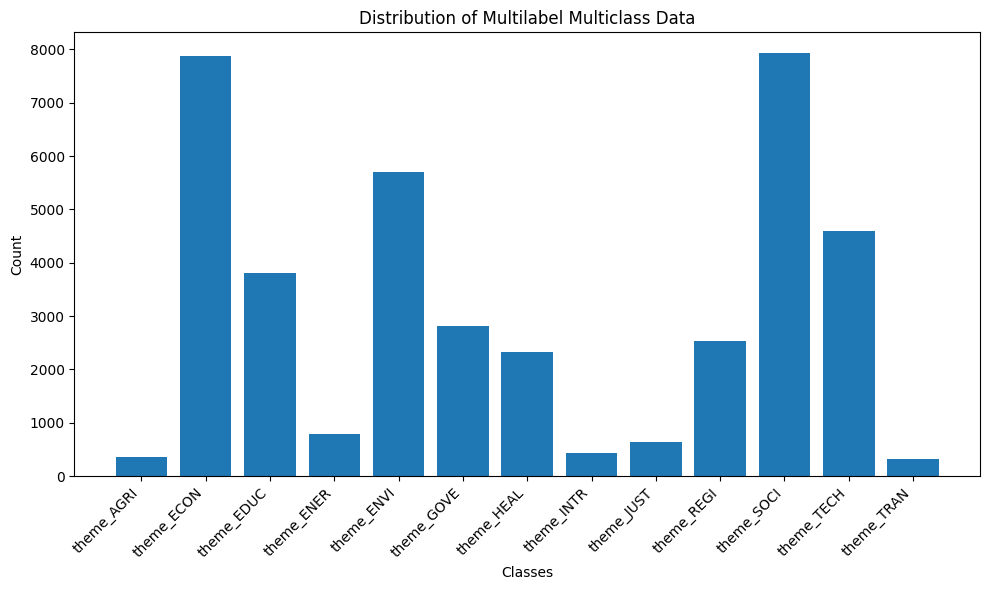

In [ ]:
# Plot the stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(class_counts.index, class_counts.values, color='tab:blue')
ax.set_xlabel('Classes')
ax.set_ylabel('Count')
ax.set_title('Distribution of Multilabel Multiclass Data')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
class_name_map = {'theme_AGRI':'Agriculture', 'theme_ECON':'Economy', 'theme_EDUC':'Education', 'theme_ENER':'Energy',
       'theme_ENVI':'Environment', 'theme_GOVE':'Government', 'theme_HEAL':'Health', 'theme_INTR':'International', 'theme_JUST':'Justice',
       'theme_REGI':'Regions', 'theme_SOCI':'Society', 'theme_TECH':'Technology', 'theme_TRAN':'Transport'}

In [ ]:
# Function to get class names for each row
def get_class_names(row):
    class_names = []
    for col in row.index:
        if col.startswith('theme_') and row[col] == 1:
            class_name = class_name_map.get(col, col)
            class_names.append(col)
    return class_names

In [ ]:
# Apply the function to create a new column
encoded_data['all_themes'] = encoded_data.apply(get_class_names, axis=1)

In [ ]:
encoded_data.drop(['theme_AGRI', 'theme_ECON', 'theme_EDUC', 'theme_ENER',
       'theme_ENVI', 'theme_GOVE', 'theme_HEAL', 'theme_INTR', 'theme_JUST',
       'theme_REGI', 'theme_SOCI', 'theme_TECH', 'theme_TRAN'], inplace=True, axis=1)

In [ ]:
# encoded_data = encoded_data.rename(columns={'theme_AGRI':'Agriculture', 'theme_ECON':'Economy', 'theme_EDUC':'Education', 'theme_ENER':'Energy',
#        'theme_ENVI':'Environment', 'theme_GOVE':'Government', 'theme_HEAL':'Health', 'theme_INTR':'International', 'theme_JUST':'Justice',
#        'theme_REGI':'Regions', 'theme_SOCI':'Society', 'theme_TECH':'Technology', 'theme_TRAN':'Transport'})

In [ ]:
encoded_data

,Translated,all_themes
0,Areas of Potential Significant Flood Risk (APS...,"[theme_ENVI, theme_HEAL]"
1,Coloniit Species Distribution Colonies Bird in...,[theme_ENVI]
2,INSPIRE Elevation (el-vec) Iceland Vektor gögn...,[theme_ENVI]
3,2019 - Post-election survey - First results ...,[theme_GOVE]
4,Zone tampon RBDD Protected sites Zone tampon RBDD,[theme_ENVI]
...,...,...
29789,NFNET and Novel Food (Novel foods and food ing...,[theme_AGRI]
29790,"Youth hostels youth, tourist, tourism, hostel ...","[theme_ECON, theme_REGI]"
29791,"Zen Car stations car, auto Location of the sta...",[theme_TRAN]
29792,Protection area 1 of water extraction - draina...,[theme_ENVI]


In [ ]:
# Function to replace values in list
def replace_values(row):
    return [class_name_map.get(col, col) for col in row['all_themes']]

# Apply the function to create a new column with replaced values
encoded_data['all_themes'] = encoded_data.apply(replace_values, axis=1)

In [ ]:
encoded_data

,Translated,all_themes
0,Areas of Potential Significant Flood Risk (APS...,"[Environment, Health]"
1,Coloniit Species Distribution Colonies Bird in...,[Environment]
2,INSPIRE Elevation (el-vec) Iceland Vektor gögn...,[Environment]
3,2019 - Post-election survey - First results ...,[Government]
4,Zone tampon RBDD Protected sites Zone tampon RBDD,[Environment]
...,...,...
29789,NFNET and Novel Food (Novel foods and food ing...,[Agriculture]
29790,"Youth hostels youth, tourist, tourism, hostel ...","[Economy, Regions]"
29791,"Zen Car stations car, auto Location of the sta...",[Transport]
29792,Protection area 1 of water extraction - draina...,[Environment]


##### 3- Preprocessing

Our origional dataset and PrefLabel_Definition is ready, but we need preliminary preprocessing such as converting to lower case, removing url, punction, and special characters from it. Keep in mind, we will not remove the stopwords because Glove consider them while creating embeddings. 

In [ ]:
# Text preprocessing function
import nltk
import re
import string
from nltk.corpus import words
from nltk.tokenize import word_tokenize, wordpunct_tokenize # for our dataset wordpunct is suitable because it also splits on punction marks 

nltk.download('wordnet')

def basic_preprocess_text(text):

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', ' ', text, flags=re.MULTILINE)

    tokens = wordpunct_tokenize(text)
    # convert to lower case
    tokens = [w.lower() for w in tokens]
    
    # remove punctuation from each word
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]


    # remove remaining tokens that are not alphabetic
    words = [word for word in stripped if word.isalpha()]
  

    return " ".join(words)
# Now proceed with the rest of the steps (train-test split, tokenization, etc.) as shown in the previous code example.

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
encoded_data['Preprocessed_Translated'] =  encoded_data['Translated'].apply(basic_preprocess_text) ## Applying basic preprocessing steps to origional dataset

In [ ]:
encoded_data[['Translated', 'Preprocessed_Translated']]

,Translated,Preprocessed_Translated
0,Areas of Potential Significant Flood Risk (APS...,areas of potential significant flood risk apsf...
1,Coloniit Species Distribution Colonies Bird in...,coloniit species distribution colonies bird in...
2,INSPIRE Elevation (el-vec) Iceland Vektor gögn...,inspire elevation el vec iceland vektor gögn l...
3,2019 - Post-election survey - First results ...,post election survey first results eurobaromet...
4,Zone tampon RBDD Protected sites Zone tampon RBDD,zone tampon rbdd protected sites zone tampon rbdd
...,...,...
29789,NFNET and Novel Food (Novel foods and food ing...,nfnet and novel food novel foods and food ingr...
29790,"Youth hostels youth, tourist, tourism, hostel ...",youth hostels youth tourist tourism hostel loc...
29791,"Zen Car stations car, auto Location of the sta...",zen car stations car auto location of the stat...
29792,Protection area 1 of water extraction - draina...,protection area of water extraction drainage g...


In [ ]:
prefLabelPlusDefinition["preprocessed_prefLabel_plus_definition"] = prefLabelPlusDefinition["prefLabel_plus_definition"].apply(basic_preprocess_text) ## Applying basic preprocessing steps to PrefLabel+defintion

In [ ]:
prefLabelPlusDefinition[['prefLabel_plus_definition',	'preprocessed_prefLabel_plus_definition']]

,prefLabel_plus_definition,preprocessed_prefLabel_plus_definition
0,Economy and finance This concept identifies da...,economy and finance this concept identifies da...
1,"Education, culture and sport This concept iden...",education culture and sport this concept ident...
2,Energy This concept identifies datasets coveri...,energy this concept identifies datasets coveri...
3,Environment This concept identifies datasets c...,environment this concept identifies datasets c...
4,Government and public sector This concept iden...,government and public sector this concept iden...
5,Health This concept identifies datasets coveri...,health this concept identifies datasets coveri...
6,"Justice, legal system and public safety This c...",justice legal system and public safety this co...
7,Population and society This concept identifies...,population and society this concept identifies...
8,Science and technology This concept identifies...,science and technology this concept identifies...
9,Transport This concept identifies datasets cov...,transport this concept identifies datasets cov...


##### 4- Applying HuggingFace Transformer Model

In [ ]:
pip install transformers

In [ ]:
from transformers import AutoTokenizer, AutoModel
import torch
import torch.nn.functional as F


# Load model from HuggingFace Hub
tokenizer = AutoTokenizer.from_pretrained('sentence-transformers/all-MiniLM-L6-v2')
model = AutoModel.from_pretrained('sentence-transformers/all-MiniLM-L6-v2')

In [ ]:
#Mean Pooling - Take attention mask into account for correct averaging
def mean_pooling(model_output, attention_mask):
    token_embeddings = model_output[0] #First element of model_output contains all token embeddings
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    return torch.sum(token_embeddings * input_mask_expanded, 1) / torch.clamp(input_mask_expanded.sum(1), min=1e-9)

In [ ]:
def get_bert_embedding(text):
    encoded_input = tokenizer(text, padding=True, truncation=True, return_tensors='pt')
    with torch.no_grad():
        model_output = model(**encoded_input)
    # Perform pooling
    sentence_embeddings = mean_pooling(model_output, encoded_input['attention_mask'])

    # Normalize embeddings
    sentence_embeddings = F.normalize(sentence_embeddings, p=2, dim=1)

    return sentence_embeddings

In [ ]:
definition_embeddings = []
for definition in prefLabelPlusDefinition["preprocessed_prefLabel_plus_definition"]:
    print("PrefLabel+Definition    :", definition)
    embedding = get_bert_embedding(definition)
    definition_embeddings.append(embedding)

PrefLabel+Definition    : economy and finance this concept identifies datasets covering such domains as economy or finance economy is the area of the production distribution and trade as well as consumption of goods and services by different agents in its broadest sense the economy is defined as a social domain that emphasize the practices discourses and material expressions associated with the production use and management of resources finance is the study of money and how it is used specifically it deals with the questions of how an individual company or government acquires the money needed and how they then spend or invest that money dataset examples tenders electronic daily ted public procurement notices from the eu and beyond general government deficit and surplus quarterly data
PrefLabel+Definition    : education culture and sport this concept identifies datasets covering such domains as education culture or sport education is the process of facilitating learning or the acquisiti

In [ ]:
definition_embeddings[0].shape

torch.Size([1, 384])

In [ ]:
#the 125 dataset embeddings (Translated)
Preprocessed_Translated = encoded_data["Preprocessed_Translated"].tolist()

In [ ]:
len(Preprocessed_Translated)

29794

In [ ]:
%%time
instance_embeddings = []
counter = 0
for instance in Preprocessed_Translated:  
  counter =  counter + 1
  embedding = get_bert_embedding(instance)
  if counter % 150 == 0:
    print("dataset instances :::: {}  :::: {}".format(counter, instance))
  instance_embeddings.append(embedding)

dataset instances :::: 150  :::: aa aa ab and ab nt imagery earth cover base map mads summary estimated observations of the biotope aa aa ab and ab were collected from the baltic sea area by expert judgements for helcom red list of biotopes habitats and biotope complexes description baltic photic or aphotic coarse sediment or sand dominated by multiple infaunal bivalve species macoma calcarea mya truncata astarte spp spisula spp the helcom red list of baltic sea underwater biotopes habitats and biotope complexes is an updated and improved version of the red list assessment of marine and coastal biotopes and biotope complexes published in the classification of the report follows the proposed international union for conservation of nature iucn criteria and assessment principals but with some modifications for the baltic sea altogether the helcom underwater biotope and habitat classification helcom hub includes biotopes of which were red listed many of the red listed biotopes are located 

In [ ]:
similarities = []

for tensor1 in instance_embeddings:
    row = []
    for tensor2 in definition_embeddings:
        similarity = cosine_similarity(tensor1.reshape(1, -1), tensor2.reshape(1, -1))
        row.append(similarity[0][0])
    similarities.append(row)

In [ ]:
len(similarities) 

29794

In [ ]:
category_labels = ['Economy', 'Education', 'Energy','Environment','Government','Health', 'Justice', 'Society', 'Technology', 
                   'Transport', 'Agriculture', 'International', 'Regions'] #['Agriculture', 'Economy', 'Education', 'Energy','Environment', 'Government', 'Health', 'International', 'Justice','Regions', 'Society', 'Technology', 'Transport']

In [ ]:
category_labels

['Economy',
 'Education',
 'Energy',
 'Environment',
 'Government',
 'Health',
 'Justice',
 'Society',
 'Technology',
 'Transport',
 'Agriculture',
 'International',
 'Regions']

One maximum Similarity of the Definition+PrefLabel and Dataset

In [ ]:
category_labels[np.argmax(similarities[0])]

'Environment'

In [ ]:
#find the index of highest value in each similarty 
max_indices = np.argmax(similarities, axis=1)

# fetch corresponding value from other list based on max index
max_category = [category_labels[i] for i in max_indices]

In [ ]:
predict_BERT_Sentence_COSINE=pd.DataFrame({'predict_BERT_Hugging_Face_Sentence_COSINE':max_category})

In [ ]:
predict_BERT_Sentence_COSINE.predict_BERT_Hugging_Face_Sentence_COSINE.value_counts()

Society          5734
Education        3845
Agriculture      3796
Environment      3591
Regions          3297
Technology       1560
Economy          1535
International    1461
Health           1456
Justice          1226
Government        826
Transport         738
Energy            729
Name: predict_BERT_Hugging_Face_Sentence_COSINE, dtype: int64

In [ ]:
predict_BERT_Sentence_COSINE

,predict_BERT_Hugging_Face_Sentence_COSINE
0,Environment
1,Agriculture
2,International
3,Education
4,Justice
...,...
29789,Agriculture
29790,Education
29791,Transport
29792,Regions


In [ ]:
result = pd.concat([encoded_data, predict_BERT_Sentence_COSINE], axis=1)

In [ ]:
result

,Translated,all_themes,Preprocessed_Translated,predict_BERT_Hugging_Face_Sentence_COSINE
0,Areas of Potential Significant Flood Risk (APS...,"[Environment, Health]",areas of potential significant flood risk apsf...,Environment
1,Coloniit Species Distribution Colonies Bird in...,[Environment],coloniit species distribution colonies bird in...,Agriculture
2,INSPIRE Elevation (el-vec) Iceland Vektor gögn...,[Environment],inspire elevation el vec iceland vektor gögn l...,International
3,2019 - Post-election survey - First results ...,[Government],post election survey first results eurobaromet...,Education
4,Zone tampon RBDD Protected sites Zone tampon RBDD,[Environment],zone tampon rbdd protected sites zone tampon rbdd,Justice
...,...,...,...,...
29789,NFNET and Novel Food (Novel foods and food ing...,[Agriculture],nfnet and novel food novel foods and food ingr...,Agriculture
29790,"Youth hostels youth, tourist, tourism, hostel ...","[Economy, Regions]",youth hostels youth tourist tourism hostel loc...,Education
29791,"Zen Car stations car, auto Location of the sta...",[Transport],zen car stations car auto location of the stat...,Transport
29792,Protection area 1 of water extraction - draina...,[Environment],protection area of water extraction drainage g...,Regions


In [ ]:
def success_criteria(row):
    if row['predict_BERT_Hugging_Face_Sentence_COSINE'] in row['all_themes']:
        return 'success'
    else:
        return 'failure'

In [ ]:
# apply the function to create a new column; if one value is matched to the origional themes
result['criteria'] = result.apply(lambda row: success_criteria(row), axis=1)

In [ ]:
result.criteria.value_counts()

success    14966
failure    14828
Name: criteria, dtype: int64

In [ ]:
Agreement = 14966/29794

In [ ]:
Agreement

0.5023159025307109

Top 2 Maximum values from the Cosine similarity matrix 

In [ ]:
import numpy as np

# get the indices of the top two maximum values in each row
top2_indices = np.argsort(similarities, axis=1)[:, -2:]

category_labels

# fetch the corresponding values based on the indices
top2_themes = [[category_labels[i] for i in row_indices] for row_indices in top2_indices]

In [ ]:
print(top2_themes[0:5])

[['Regions', 'Environment'], ['Society', 'Agriculture'], ['Environment', 'International'], ['Justice', 'Education'], ['Regions', 'Justice']]


In [ ]:
Prediction_BERT_top_2 = pd.DataFrame({'Prediction_BERT_Sentence_top_2_themes':top2_themes})

In [ ]:
result2 = pd.concat([encoded_data, Prediction_BERT_top_2], axis=1)

In [ ]:
result2

,Translated,all_themes,Preprocessed_Translated,Prediction_BERT_Sentence_top_2_themes
0,Areas of Potential Significant Flood Risk (APS...,"[Environment, Health]",areas of potential significant flood risk apsf...,"[Regions, Environment]"
1,Coloniit Species Distribution Colonies Bird in...,[Environment],coloniit species distribution colonies bird in...,"[Society, Agriculture]"
2,INSPIRE Elevation (el-vec) Iceland Vektor gögn...,[Environment],inspire elevation el vec iceland vektor gögn l...,"[Environment, International]"
3,2019 - Post-election survey - First results ...,[Government],post election survey first results eurobaromet...,"[Justice, Education]"
4,Zone tampon RBDD Protected sites Zone tampon RBDD,[Environment],zone tampon rbdd protected sites zone tampon rbdd,"[Regions, Justice]"
...,...,...,...,...
29789,NFNET and Novel Food (Novel foods and food ing...,[Agriculture],nfnet and novel food novel foods and food ingr...,"[Environment, Agriculture]"
29790,"Youth hostels youth, tourist, tourism, hostel ...","[Economy, Regions]",youth hostels youth tourist tourism hostel loc...,"[Regions, Education]"
29791,"Zen Car stations car, auto Location of the sta...",[Transport],zen car stations car auto location of the stat...,"[Regions, Transport]"
29792,Protection area 1 of water extraction - draina...,[Environment],protection area of water extraction drainage g...,"[Justice, Regions]"


In [ ]:
# Define a function to check for intersection between two lists
def criteria_of_success(row):
    all_themes = row['all_themes']
    predictions = row['Prediction_BERT_Sentence_top_2_themes']
    if set(all_themes).intersection(set(predictions)):
        return 'success'
    else:
        return 'failure'

In [ ]:
# Apply the function to create a new column
result2['Criteria_Success_top_2'] = result2.apply(criteria_of_success, axis=1)

In [ ]:
result2

,Translated,all_themes,Preprocessed_Translated,Prediction_BERT_Sentence_top_2_themes,Criteria_Success_top_2
0,Areas of Potential Significant Flood Risk (APS...,"[Environment, Health]",areas of potential significant flood risk apsf...,"[Regions, Environment]",success
1,Coloniit Species Distribution Colonies Bird in...,[Environment],coloniit species distribution colonies bird in...,"[Society, Agriculture]",failure
2,INSPIRE Elevation (el-vec) Iceland Vektor gögn...,[Environment],inspire elevation el vec iceland vektor gögn l...,"[Environment, International]",success
3,2019 - Post-election survey - First results ...,[Government],post election survey first results eurobaromet...,"[Justice, Education]",failure
4,Zone tampon RBDD Protected sites Zone tampon RBDD,[Environment],zone tampon rbdd protected sites zone tampon rbdd,"[Regions, Justice]",failure
...,...,...,...,...,...
29789,NFNET and Novel Food (Novel foods and food ing...,[Agriculture],nfnet and novel food novel foods and food ingr...,"[Environment, Agriculture]",success
29790,"Youth hostels youth, tourist, tourism, hostel ...","[Economy, Regions]",youth hostels youth tourist tourism hostel loc...,"[Regions, Education]",success
29791,"Zen Car stations car, auto Location of the sta...",[Transport],zen car stations car auto location of the stat...,"[Regions, Transport]",success
29792,Protection area 1 of water extraction - draina...,[Environment],protection area of water extraction drainage g...,"[Justice, Regions]",failure


In [ ]:
result2.Criteria_Success_top_2.value_counts()

success    20064
failure     9730
Name: Criteria_Success_top_2, dtype: int64

In [ ]:
print("Agreement for the top 2 themes prediction using HuggingFace Transformer   :", 20064 / 29794)

Agreement for the top 2 themes prediction using HuggingFace Transformer   : 0.6734241793649728


Top 3 Maximum values from the Cosine similarity matrix

In [ ]:
import numpy as np


# get the indices of the top three maximum values in each row
top3_indices = np.argsort(similarities, axis=1)[:, -3:]

category_labels

# fetch the corresponding values based on the indices
top3_themes = [[category_labels[i] for i in row_indices] for row_indices in top3_indices]



In [ ]:
print(top3_themes[0:5])

[['Agriculture', 'Regions', 'Environment'], ['Transport', 'Society', 'Agriculture'], ['Agriculture', 'Environment', 'International'], ['International', 'Justice', 'Education'], ['Government', 'Regions', 'Justice']]


In [ ]:
Prediction_BERT_top_3_themes = pd.DataFrame({'Prediction_BERT_top_3_themes':top3_themes})

In [ ]:
result3 = pd.concat([encoded_data, Prediction_BERT_top_3_themes], axis=1)

In [ ]:
result3

,Translated,all_themes,Preprocessed_Translated,Prediction_BERT_top_3_themes
0,Areas of Potential Significant Flood Risk (APS...,"[Environment, Health]",areas of potential significant flood risk apsf...,"[Agriculture, Regions, Environment]"
1,Coloniit Species Distribution Colonies Bird in...,[Environment],coloniit species distribution colonies bird in...,"[Transport, Society, Agriculture]"
2,INSPIRE Elevation (el-vec) Iceland Vektor gögn...,[Environment],inspire elevation el vec iceland vektor gögn l...,"[Agriculture, Environment, International]"
3,2019 - Post-election survey - First results ...,[Government],post election survey first results eurobaromet...,"[International, Justice, Education]"
4,Zone tampon RBDD Protected sites Zone tampon RBDD,[Environment],zone tampon rbdd protected sites zone tampon rbdd,"[Government, Regions, Justice]"
...,...,...,...,...
29789,NFNET and Novel Food (Novel foods and food ing...,[Agriculture],nfnet and novel food novel foods and food ingr...,"[Justice, Environment, Agriculture]"
29790,"Youth hostels youth, tourist, tourism, hostel ...","[Economy, Regions]",youth hostels youth tourist tourism hostel loc...,"[Economy, Regions, Education]"
29791,"Zen Car stations car, auto Location of the sta...",[Transport],zen car stations car auto location of the stat...,"[Economy, Regions, Transport]"
29792,Protection area 1 of water extraction - draina...,[Environment],protection area of water extraction drainage g...,"[Environment, Justice, Regions]"


In [ ]:
# Define a function to check for intersection between two lists
def criteria_of_success_3(row):
    all_themes = row['all_themes']
    predictions = row['Prediction_BERT_top_3_themes']
    if set(all_themes).intersection(set(predictions)):
        return 'success'
    else:
        return 'failure'

In [ ]:
# Apply the function to create a new column
result3['Criteria_Success_top_3'] = result3.apply(criteria_of_success_3, axis=1)

In [ ]:
result3

,Translated,all_themes,Preprocessed_Translated,Prediction_BERT_top_3_themes,Criteria_Success_top_3
0,Areas of Potential Significant Flood Risk (APS...,"[Environment, Health]",areas of potential significant flood risk apsf...,"[Agriculture, Regions, Environment]",success
1,Coloniit Species Distribution Colonies Bird in...,[Environment],coloniit species distribution colonies bird in...,"[Transport, Society, Agriculture]",failure
2,INSPIRE Elevation (el-vec) Iceland Vektor gögn...,[Environment],inspire elevation el vec iceland vektor gögn l...,"[Agriculture, Environment, International]",success
3,2019 - Post-election survey - First results ...,[Government],post election survey first results eurobaromet...,"[International, Justice, Education]",failure
4,Zone tampon RBDD Protected sites Zone tampon RBDD,[Environment],zone tampon rbdd protected sites zone tampon rbdd,"[Government, Regions, Justice]",failure
...,...,...,...,...,...
29789,NFNET and Novel Food (Novel foods and food ing...,[Agriculture],nfnet and novel food novel foods and food ingr...,"[Justice, Environment, Agriculture]",success
29790,"Youth hostels youth, tourist, tourism, hostel ...","[Economy, Regions]",youth hostels youth tourist tourism hostel loc...,"[Economy, Regions, Education]",success
29791,"Zen Car stations car, auto Location of the sta...",[Transport],zen car stations car auto location of the stat...,"[Economy, Regions, Transport]",success
29792,Protection area 1 of water extraction - draina...,[Environment],protection area of water extraction drainage g...,"[Environment, Justice, Regions]",success


In [ ]:
result3.Criteria_Success_top_3.value_counts()

success    22215
failure     7579
Name: Criteria_Success_top_3, dtype: int64

In [ ]:
print("Agreement for the top 3 themes prediction using HuggingFace   :", 22215 / 29794)

Agreement for the top 3 themes prediction using HuggingFace   : 0.7456199234745251


#### 8- HuggingFace Transformers model 125 Random samples/instances without Pre-processing


##### 1- load the Definition+PrefLabel data

In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
import pandas as pd
prefLabelPlusDefinition=pd.read_csv("/content/drive/MyDrive/Thematic Annotation of Government data/Datasets/PrefLabel_plus_definition.csv")

In [ ]:
prefLabelPlusDefinition

,s,preflabel,definition,prefLabel_plus_definition
0,http://publications.europa.eu/resource/authori...,Economy and finance,This concept identifies datasets covering such...,Economy and finance This concept identifies da...
1,http://publications.europa.eu/resource/authori...,"Education, culture and sport",This concept identifies datasets covering such...,"Education, culture and sport This concept iden..."
2,http://publications.europa.eu/resource/authori...,Education,This concept identifies datasets covering such...,Education This concept identifies datasets cov...
3,http://publications.europa.eu/resource/authori...,Energy,This concept identifies datasets covering the ...,Energy This concept identifies datasets coveri...
4,http://publications.europa.eu/resource/authori...,Environment,This concept identifies datasets covering the ...,Environment This concept identifies datasets c...
5,http://publications.europa.eu/resource/authori...,Government and public sector,This concept identifies datasets covering such...,Government and public sector This concept iden...
6,http://publications.europa.eu/resource/authori...,Health,This concept identifies datasets covering the ...,Health This concept identifies datasets coveri...
7,http://publications.europa.eu/resource/authori...,"Justice, legal system and public safety",This concept identifies datasets covering such...,"Justice, legal system and public safety This c..."
8,http://publications.europa.eu/resource/authori...,Population and society,This concept identifies datasets covering such...,Population and society This concept identifies...
9,http://publications.europa.eu/resource/authori...,Science and technology,This concept identifies datasets covering such...,Science and technology This concept identifies...


In [ ]:
prefLabelPlusDefinition = prefLabelPlusDefinition.drop(2)

# reset the index of the DataFrame
prefLabelPlusDefinition = prefLabelPlusDefinition.reset_index(drop=True)
prefLabelPlusDefinition

,s,preflabel,definition,prefLabel_plus_definition
0,http://publications.europa.eu/resource/authori...,Economy and finance,This concept identifies datasets covering such...,Economy and finance This concept identifies da...
1,http://publications.europa.eu/resource/authori...,"Education, culture and sport",This concept identifies datasets covering such...,"Education, culture and sport This concept iden..."
2,http://publications.europa.eu/resource/authori...,Energy,This concept identifies datasets covering the ...,Energy This concept identifies datasets coveri...
3,http://publications.europa.eu/resource/authori...,Environment,This concept identifies datasets covering the ...,Environment This concept identifies datasets c...
4,http://publications.europa.eu/resource/authori...,Government and public sector,This concept identifies datasets covering such...,Government and public sector This concept iden...
5,http://publications.europa.eu/resource/authori...,Health,This concept identifies datasets covering the ...,Health This concept identifies datasets coveri...
6,http://publications.europa.eu/resource/authori...,"Justice, legal system and public safety",This concept identifies datasets covering such...,"Justice, legal system and public safety This c..."
7,http://publications.europa.eu/resource/authori...,Population and society,This concept identifies datasets covering such...,Population and society This concept identifies...
8,http://publications.europa.eu/resource/authori...,Science and technology,This concept identifies datasets covering such...,Science and technology This concept identifies...
9,http://publications.europa.eu/resource/authori...,Transport,This concept identifies datasets covering the ...,Transport This concept identifies datasets cov...


##### 2- Load the dataset which is translated with MultiLabel multi-classified

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Thematic Annotation of Government data/Datasets/Data_All_Included_translated.csv", encoding=" ISO-8859-1")

In [ ]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
encoded_data = pd.get_dummies(data, columns=['theme'])

In [ ]:
encoded_data

,dataset,title,keywords,description,combined,Detected Language,Translated,theme_AGRI,theme_ECON,theme_EDUC,theme_ENER,theme_ENVI,theme_GOVE,theme_HEAL,theme_INTR,theme_JUST,theme_REGI,theme_SOCI,theme_TECH,theme_TRAN
0,http://data.europa.eu/88u/dataset/urn-ine-es-t...,Population in group establishments by Province...,"size of the municipality, Structure and situat...",Table of INEBase\nPopulation in group establis...,Population in group establishments by Province...,en,Population in group establishments by Province...,0,0,0,0,0,0,0,0,0,0,1,0,0
1,http://data.europa.eu/88u/dataset/jrc-odin-192...,Small punch tensile/fracture test data for P91...,Elevated temperature material properties,Open access small punch data created by the Eu...,Small punch tensile/fracture test data for P91...,en,Small punch tensile/fracture test data for P91...,0,0,0,0,0,0,0,0,0,0,0,1,0
2,http://data.europa.eu/88u/dataset/s623_217,Flash Eurobarometer 217: Intercultural dialogu...,"surveys, polls, opinion, intercultural, flash,...","To assess on the preparation, effectiveness an...",Flash Eurobarometer 217: Intercultural dialogu...,en,Flash Eurobarometer 217: Intercultural dialogu...,0,0,0,0,0,1,0,0,0,0,0,0,0
3,http://data.europa.eu/88u/dataset/urn-ine-es-t...,Actividades de educación no formal realizadas ...,Survey on Adult Population Involvement in Lear...,Table of INEBase\nActividades de educación no ...,Actividades de educación no formal realizadas ...,es,Non -formal education activities carried out f...,0,1,0,0,0,0,0,0,0,0,0,0,0
4,http://data.europa.eu/88u/dataset/urn-ine-es-t...,Criminal offences charged against the person c...,"UE27_2020 without Spain, Statistics on Domesti...",Table of INEBase\nCriminal offences charged ag...,Criminal offences charged against the person c...,en,Criminal offences charged against the person c...,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40117,http://data.europa.eu/88u/dataset/urn-ine-es-t...,Graduados universitarios según hayan rechazado...,Survey on the Labour Insertion of University G...,Table of INEBase\nGraduados universitarios seg...,Graduados universitarios según hayan rechazado...,es,University graduates as they have rejected som...,0,1,0,0,0,0,0,0,0,0,0,0,0
40118,http://data.europa.eu/88u/dataset/s2091_83_4_4...,Special Eurobarometer 436: Attitudes of Europe...,special eurobarometer,Biodiversity  the unique web of life on Earth...,Special Eurobarometer 436: Attitudes of Europe...,en,Special Eurobarometer 436: Attitudes of Europe...,0,0,0,0,0,1,0,0,0,0,0,0,0
40119,http://data.europa.eu/88u/dataset/2e24efac-795...,CORINE Land Cover changes Iceland 2018 (CHA),"INSPIRE, GSL, Evrópuverkefni, Downloadable dat...",Corine Land Cover (CLC) 2018 and CLC change 20...,CORINE Land Cover changes Iceland 2018 (CHA) I...,en,CORINE Land Cover changes Iceland 2018 (CHA) I...,0,0,0,0,1,0,0,0,0,0,0,0,0
40120,http://data.europa.eu/88u/dataset/urn-ine-es-t...,Control de la empresa (público o privado). EAE...,"Statistics, Labour market and wages, Income an...",Table of INEBase\nControl de la empresa (públi...,Control de la empresa (público o privado). EAE...,es,Company control (public or private). EAES: Q (...,0,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
data.columns

Index(['dataset', 'title', 'keywords', 'description', 'theme', 'combined',
       'Detected Language', 'Translated'],
      dtype='object')

In [ ]:
encoded_data=encoded_data.groupby(['dataset', 'title', 'keywords', 'description','combined', 'Translated']).sum().reset_index()

<ipython-input-12-4704bd5f2bf8>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  encoded_data=encoded_data.groupby(['dataset', 'title', 'keywords', 'description','combined', 'Translated']).sum().reset_index()


In [ ]:
encoded_data

,dataset,title,keywords,description,combined,Translated,theme_AGRI,theme_ECON,theme_EDUC,theme_ENER,theme_ENVI,theme_GOVE,theme_HEAL,theme_INTR,theme_JUST,theme_REGI,theme_SOCI,theme_TECH,theme_TRAN
0,http://data.europa.eu/88u/dataset/-05d93b33-10...,Areas of Potential Significant Flood Risk (APSFR),Hydrography,Areas where there is a significant risk of flo...,Areas of Potential Significant Flood Risk (APS...,Areas of Potential Significant Flood Risk (APS...,0,0,0,0,1,0,1,0,0,0,0,0,0
1,http://data.europa.eu/88u/dataset/-0f77b543-f2...,coloniiT,Species distribution,colonii pasari in RBDD,coloniiT Species distribution colonii pasari i...,Coloniit Species Distribution Colonies Bird in...,0,0,0,0,1,0,0,0,0,0,0,0,0
2,http://data.europa.eu/88u/dataset/-117159f0-6c...,INSPIRE Elevation (el-vec) Iceland,"Vektor gögn LMÍ, Opin gögn LMÍ, Open data, INS...",ELF Elevation (EL) Iceland is one of 12 themes...,INSPIRE Elevation (el-vec) Iceland Vektor gögn...,INSPIRE Elevation (el-vec) Iceland Vektor gögn...,0,0,0,0,1,0,0,0,0,0,0,0,0
3,http://data.europa.eu/88u/dataset/-2019-post-e...,2019 - Post-election survey - First results,Eurobarometer,A significant increase in young people with a ...,2019 - Post-election survey - First results ...,2019 - Post-election survey - First results ...,0,0,0,0,0,1,0,0,0,0,0,0,0
4,http://data.europa.eu/88u/dataset/-22c993ed-b7...,Zone tampon RBDD,Protected sites,Zone tampon RBDD,Zone tampon RBDD Protected sites Zone tampon RBDD,Zone tampon RBDD Protected sites Zone tampon RBDD,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29789,http://data.europa.eu/88u/dataset/xt4uwrpbr87x...,NFNET and Novel Food (Novel foods and food ing...,"third country, single market, packaging produc...",The rules for authorising novel foods and food...,NFNET and Novel Food (Novel foods and food ing...,NFNET and Novel Food (Novel foods and food ing...,1,0,0,0,0,0,0,0,0,0,0,0,0
29790,http://data.europa.eu/88u/dataset/youth-hostels,Youth hostels,"youth, tourist, tourism, hostel",Location of the youth hotels on the territory ...,"Youth hostels youth, tourist, tourism, hostel ...","Youth hostels youth, tourist, tourism, hostel ...",0,1,0,0,0,0,0,0,0,1,0,0,0
29791,http://data.europa.eu/88u/dataset/zen-car-stat...,Zen Car stations,"car, auto",Location of the stations of the Zen Car electr...,"Zen Car stations car, auto Location of the sta...","Zen Car stations car, auto Location of the sta...",0,0,0,0,0,0,0,0,0,0,0,0,1
29792,http://data.europa.eu/88u/dataset/zone1_protec...,Protection area 1 of water extraction - draina...,"water protection area, water collection, water...",Brussels-Capital Region : location of Brussels...,Protection area 1 of water extraction - draina...,Protection area 1 of water extraction - draina...,0,0,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
encoded_data.columns

Index(['dataset', 'title', 'keywords', 'description', 'combined', 'Translated',
       'theme_AGRI', 'theme_ECON', 'theme_EDUC', 'theme_ENER', 'theme_ENVI',
       'theme_GOVE', 'theme_HEAL', 'theme_INTR', 'theme_JUST', 'theme_REGI',
       'theme_SOCI', 'theme_TECH', 'theme_TRAN'],
      dtype='object')

In [ ]:
#remove the unwanted coloumns 
encoded_data=encoded_data.drop(['dataset', 'title', 'keywords', 'description', 'combined'], axis=1)
encoded_data

,Translated,theme_AGRI,theme_ECON,theme_EDUC,theme_ENER,theme_ENVI,theme_GOVE,theme_HEAL,theme_INTR,theme_JUST,theme_REGI,theme_SOCI,theme_TECH,theme_TRAN
0,Areas of Potential Significant Flood Risk (APS...,0,0,0,0,1,0,1,0,0,0,0,0,0
1,Coloniit Species Distribution Colonies Bird in...,0,0,0,0,1,0,0,0,0,0,0,0,0
2,INSPIRE Elevation (el-vec) Iceland Vektor gögn...,0,0,0,0,1,0,0,0,0,0,0,0,0
3,2019 - Post-election survey - First results ...,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Zone tampon RBDD Protected sites Zone tampon RBDD,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29789,NFNET and Novel Food (Novel foods and food ing...,1,0,0,0,0,0,0,0,0,0,0,0,0
29790,"Youth hostels youth, tourist, tourism, hostel ...",0,1,0,0,0,0,0,0,0,1,0,0,0
29791,"Zen Car stations car, auto Location of the sta...",0,0,0,0,0,0,0,0,0,0,0,0,1
29792,Protection area 1 of water extraction - draina...,0,0,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
encoded_data.columns

Index(['Translated', 'theme_AGRI', 'theme_ECON', 'theme_EDUC', 'theme_ENER',
       'theme_ENVI', 'theme_GOVE', 'theme_HEAL', 'theme_INTR', 'theme_JUST',
       'theme_REGI', 'theme_SOCI', 'theme_TECH', 'theme_TRAN'],
      dtype='object')

In [ ]:
class_counts=encoded_data.iloc[:, 1:].sum(axis=0)

In [ ]:
print(class_counts)

theme_AGRI     363
theme_ECON    7870
theme_EDUC    3811
theme_ENER     797
theme_ENVI    5694
theme_GOVE    2804
theme_HEAL    2333
theme_INTR     441
theme_JUST     647
theme_REGI    2524
theme_SOCI    7924
theme_TECH    4594
theme_TRAN     310
dtype: int64


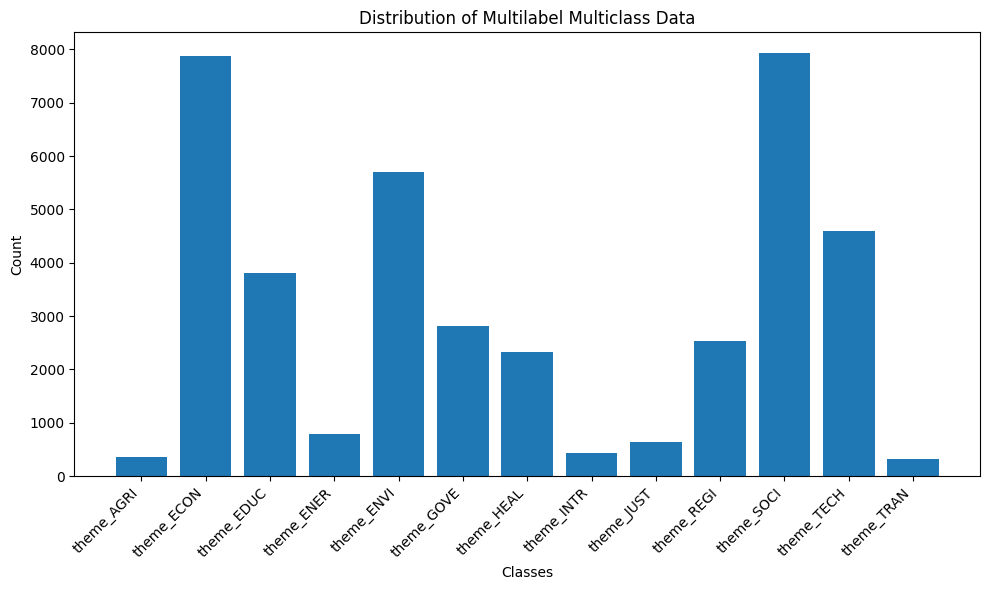

In [ ]:
# Plot the stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(class_counts.index, class_counts.values, color='tab:blue')
ax.set_xlabel('Classes')
ax.set_ylabel('Count')
ax.set_title('Distribution of Multilabel Multiclass Data')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
class_name_map = {'theme_AGRI':'Agriculture', 'theme_ECON':'Economy', 'theme_EDUC':'Education', 'theme_ENER':'Energy',
       'theme_ENVI':'Environment', 'theme_GOVE':'Government', 'theme_HEAL':'Health', 'theme_INTR':'International', 'theme_JUST':'Justice',
       'theme_REGI':'Regions', 'theme_SOCI':'Society', 'theme_TECH':'Technology', 'theme_TRAN':'Transport'}

In [ ]:
# Function to get class names for each row
def get_class_names(row):
    class_names = []
    for col in row.index:
        if col.startswith('theme_') and row[col] == 1:
            class_name = class_name_map.get(col, col)
            class_names.append(col)
    return class_names

In [ ]:
# Apply the function to create a new column
encoded_data['all_themes'] = encoded_data.apply(get_class_names, axis=1)

In [ ]:
encoded_data.drop(['theme_AGRI', 'theme_ECON', 'theme_EDUC', 'theme_ENER',
       'theme_ENVI', 'theme_GOVE', 'theme_HEAL', 'theme_INTR', 'theme_JUST',
       'theme_REGI', 'theme_SOCI', 'theme_TECH', 'theme_TRAN'], inplace=True, axis=1)

In [ ]:
# encoded_data = encoded_data.rename(columns={'theme_AGRI':'Agriculture', 'theme_ECON':'Economy', 'theme_EDUC':'Education', 'theme_ENER':'Energy',
#        'theme_ENVI':'Environment', 'theme_GOVE':'Government', 'theme_HEAL':'Health', 'theme_INTR':'International', 'theme_JUST':'Justice',
#        'theme_REGI':'Regions', 'theme_SOCI':'Society', 'theme_TECH':'Technology', 'theme_TRAN':'Transport'})

In [ ]:
encoded_data

,Translated,all_themes
0,Areas of Potential Significant Flood Risk (APS...,"[theme_ENVI, theme_HEAL]"
1,Coloniit Species Distribution Colonies Bird in...,[theme_ENVI]
2,INSPIRE Elevation (el-vec) Iceland Vektor gögn...,[theme_ENVI]
3,2019 - Post-election survey - First results ...,[theme_GOVE]
4,Zone tampon RBDD Protected sites Zone tampon RBDD,[theme_ENVI]
...,...,...
29789,NFNET and Novel Food (Novel foods and food ing...,[theme_AGRI]
29790,"Youth hostels youth, tourist, tourism, hostel ...","[theme_ECON, theme_REGI]"
29791,"Zen Car stations car, auto Location of the sta...",[theme_TRAN]
29792,Protection area 1 of water extraction - draina...,[theme_ENVI]


In [ ]:
# Function to replace values in list
def replace_values(row):
    return [class_name_map.get(col, col) for col in row['all_themes']]

# Apply the function to create a new column with replaced values
encoded_data['all_themes'] = encoded_data.apply(replace_values, axis=1)

In [ ]:
encoded_data

,Translated,all_themes
0,Areas of Potential Significant Flood Risk (APS...,"[Environment, Health]"
1,Coloniit Species Distribution Colonies Bird in...,[Environment]
2,INSPIRE Elevation (el-vec) Iceland Vektor gögn...,[Environment]
3,2019 - Post-election survey - First results ...,[Government]
4,Zone tampon RBDD Protected sites Zone tampon RBDD,[Environment]
...,...,...
29789,NFNET and Novel Food (Novel foods and food ing...,[Agriculture]
29790,"Youth hostels youth, tourist, tourism, hostel ...","[Economy, Regions]"
29791,"Zen Car stations car, auto Location of the sta...",[Transport]
29792,Protection area 1 of water extraction - draina...,[Environment]


In [ ]:
pip install transformers

In [ ]:
from transformers import AutoTokenizer, AutoModel
import torch
import torch.nn.functional as F


# Load model from HuggingFace Hub
tokenizer = AutoTokenizer.from_pretrained('sentence-transformers/all-MiniLM-L6-v2')
model = AutoModel.from_pretrained('sentence-transformers/all-MiniLM-L6-v2')

loading file vocab.txt from cache at /root/.cache/huggingface/hub/models--sentence-transformers--all-MiniLM-L6-v2/snapshots/7dbbc90392e2f80f3d3c277d6e90027e55de9125/vocab.txt
loading file tokenizer.json from cache at /root/.cache/huggingface/hub/models--sentence-transformers--all-MiniLM-L6-v2/snapshots/7dbbc90392e2f80f3d3c277d6e90027e55de9125/tokenizer.json
loading file added_tokens.json from cache at None
loading file special_tokens_map.json from cache at /root/.cache/huggingface/hub/models--sentence-transformers--all-MiniLM-L6-v2/snapshots/7dbbc90392e2f80f3d3c277d6e90027e55de9125/special_tokens_map.json
loading file tokenizer_config.json from cache at /root/.cache/huggingface/hub/models--sentence-transformers--all-MiniLM-L6-v2/snapshots/7dbbc90392e2f80f3d3c277d6e90027e55de9125/tokenizer_config.json


loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--sentence-transformers--all-MiniLM-L6-v2/snapshots/7dbbc90392e2f80f3d3c277d6e90027e55de9125/config.json
Model config BertConfig {
  "_name_or_path": "sentence-transformers/all-MiniLM-L6-v2",
  "architectures": [
    "BertModel"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 384,
  "initializer_range": 0.02,
  "intermediate_size": 1536,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 6,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.29.0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}



loading weights file pytorch_model.bin from cache at /root/.cache/huggingface/hub/models--sentence-transformers--all-MiniLM-L6-v2/snapshots/7dbbc90392e2f80f3d3c277d6e90027e55de9125/pytorch_model.bin
All model checkpoint weights were used when initializing BertModel.

All the weights of BertModel were initialized from the model checkpoint at sentence-transformers/all-MiniLM-L6-v2.
If your task is similar to the task the model of the checkpoint was trained on, you can already use BertModel for predictions without further training.


In [ ]:
#Mean Pooling - Take attention mask into account for correct averaging
def mean_pooling(model_output, attention_mask):
    token_embeddings = model_output[0] #First element of model_output contains all token embeddings
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    return torch.sum(token_embeddings * input_mask_expanded, 1) / torch.clamp(input_mask_expanded.sum(1), min=1e-9)

In [ ]:
def get_bert_embedding(text):
    encoded_input = tokenizer(text, padding=True, truncation=True, return_tensors='pt')
    with torch.no_grad():
        model_output = model(**encoded_input)
    # Perform pooling
    sentence_embeddings = mean_pooling(model_output, encoded_input['attention_mask'])

    # Normalize embeddings
    sentence_embeddings = F.normalize(sentence_embeddings, p=2, dim=1)

    # embeddings = model_output.last_hidden_state[:, 0, :].squeeze().numpy()  ##Getting weights from the last layer of the BERT
    return sentence_embeddings

In [ ]:
definition_embeddings = []
for definition in prefLabelPlusDefinition["preprocessed_prefLabel_plus_definition"]:
    print("PrefLabel+Definition    :", definition)
    embedding = get_bert_embedding(definition)
    definition_embeddings.append(embedding)

PrefLabel+Definition    : economy and finance this concept identifies datasets covering such domains as economy or finance economy is the area of the production distribution and trade as well as consumption of goods and services by different agents in its broadest sense the economy is defined as a social domain that emphasize the practices discourses and material expressions associated with the production use and management of resources finance is the study of money and how it is used specifically it deals with the questions of how an individual company or government acquires the money needed and how they then spend or invest that money dataset examples tenders electronic daily ted public procurement notices from the eu and beyond general government deficit and surplus quarterly data
PrefLabel+Definition    : education culture and sport this concept identifies datasets covering such domains as education culture or sport education is the process of facilitating learning or the acquisiti

In [ ]:
definition_embeddings[0].shape

torch.Size([1, 384])

In [ ]:
random_indices = [6895,1361,17063,2984,22200,82,20941,20045,20534,17784,6597,461,20779,22201,17427,12655,13145,28347,
                  18513,21148,28347,6895,25351,27717,17147,4212,19771,211,5509,6550,22076,26511,10707,24054,24380,6129,
                  487,14588,29790,24276,6486,18131,7451,1381,26005,11114,17841,10612,18541,10061,8286,28464,6433,22227,
                  24184,20855,12971,10743,19766,8042,26544,5552,27967,23069,28046,26544,6819,17393,12412,4699,29422,21049,
                  15979,6450,5498,22477,2840,7545,28148,26704,27962,5864,128,14111,4934,14254,14103,3327,18983,26438,28012,
                  1994,23455,5236,29097,25410,2168,12911,22897,9,24115,11434,24621,23844,11730,22061,24997,26484,12363,9944,
                  12379,14111,13161,1569,10700,18259,9983,23802,20594,15198,12934,6093,21502,11104,7192]

In [ ]:
#the 125 dataset embeddings (Translated)
Preprocessed_Translated_125 = encoded_data["Preprocessed_Translated"].iloc[random_indices].tolist()

In [ ]:
Preprocessed_Translated_125

['english finnish corpus from finnish information bank processed group resources for language technologies finland in your language information about finland moving to finland living in finland this dataset has been created within the framework of the european language resource coordination elrc connecting europe facility automated translation cef at actions smart and smart for further information on the project',
 'biological zones of the eu s atlantic area upper slope upper bathyal mid bathyal lower bathyal infralittoral circalittoral biological zones oceanographic geographical features meshatlantic marine habitat mapping hydrography eunis bio geographical regions atlantic abyssal this layer is a model of the biological zones of the eu s atlantic area it was performed within the framework of meshatlantic project interreg atlantic area program this layer was modelled with the use of bespoke base layers that were the bathymetry wave wavelength and the kdpar the biological zones boundar

In [ ]:
len(Preprocessed_Translated_125)

125

In [ ]:
%%time
instance_embeddings = []
counter = 0
for instance in Preprocessed_Translated_125:  
  counter =  counter + 1
  embedding = get_bert_embedding(instance)
  print("dataset instances :::: {}  :::: {}".format(counter, instance))
  instance_embeddings.append(embedding)

dataset instances :::: 1  :::: english finnish corpus from finnish information bank processed group resources for language technologies finland in your language information about finland moving to finland living in finland this dataset has been created within the framework of the european language resource coordination elrc connecting europe facility automated translation cef at actions smart and smart for further information on the project
dataset instances :::: 2  :::: biological zones of the eu s atlantic area upper slope upper bathyal mid bathyal lower bathyal infralittoral circalittoral biological zones oceanographic geographical features meshatlantic marine habitat mapping hydrography eunis bio geographical regions atlantic abyssal this layer is a model of the biological zones of the eu s atlantic area it was performed within the framework of meshatlantic project interreg atlantic area program this layer was modelled with the use of bespoke base layers that were the bathymetry wa

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

similarities = cosine_similarity(instance_embeddings, definition_embeddings)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:45: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  X = np.asarray(X)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:45: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.asarray(X)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:50: FutureWarning: The input

ValueError: ignored

In [ ]:
similarities = []

for tensor1 in instance_embeddings:
    row = []
    for tensor2 in definition_embeddings:
        similarity = cosine_similarity(tensor1.reshape(1, -1), tensor2.reshape(1, -1))
        row.append(similarity[0][0])
    similarities.append(row)

print(similarities)

[[0.25598803, 0.22897694, 0.23863617, 0.19536845, 0.27128774, 0.28603333, 0.25969073, 0.1789743, 0.23072079, 0.28308475, 0.2832126, 0.34656352, 0.31342024], [0.06859656, 0.103759594, 0.20160317, 0.20683065, 0.064661875, 0.11603607, 0.1321171, 0.08751406, 0.18607315, 0.15359709, 0.23636729, 0.15324822, 0.21407402], [0.15000287, 0.21586634, 0.082482494, -0.027212542, 0.17804995, 0.15494098, 0.13030481, 0.1330001, 0.1686525, 0.07526806, 0.054830983, 0.09934886, 0.17345946], [-0.06848208, 0.019403031, 0.16246015, 0.21987101, 0.035674438, 0.08006958, 0.2198461, 0.022539593, 0.13131204, 0.01758101, 0.16725719, 0.07663218, 0.09865461], [0.17382672, 0.07977815, 0.17062867, 0.12052949, 0.31752548, 0.14526743, 0.19804856, 0.3754677, 0.052061655, 0.12268978, 0.104008585, 0.08583777, 0.37773857], [0.07497739, 0.015671099, 0.09992505, 0.17037657, 0.07991552, 0.037834425, 0.01126948, 0.13235766, 0.11921008, 0.13214357, 0.3591438, 0.00053274445, 0.092890434], [0.16067451, 0.32868665, 0.15915892, 0.27

In [ ]:
len(similarity_matrix[0])

13

In [ ]:
category_labels = ['Economy', 'Education', 'Energy','Environment','Government','Health', 'Justice', 'Society', 'Technology', 
                   'Transport', 'Agriculture', 'International', 'Regions'] #['Agriculture', 'Economy', 'Education', 'Energy','Environment', 'Government', 'Health', 'International', 'Justice','Regions', 'Society', 'Technology', 'Transport']

In [ ]:
category_labels

['Economy',
 'Education',
 'Energy',
 'Environment',
 'Government',
 'Health',
 'Justice',
 'Society',
 'Technology',
 'Transport',
 'Agriculture',
 'International',
 'Regions']

One maximum Similarity of the Definition+PrefLabel and Dataset

In [ ]:
category_labels[np.argmax(similarities[0])]

'International'

In [ ]:
#find the index of highest value in each similarty 
max_indices = np.argmax(similarities, axis=1)

# fetch corresponding value from other list based on max index
max_category = [category_labels[i] for i in max_indices]

In [ ]:
predict_BERT_Sentence_COSINE=pd.DataFrame({'predict_BERT_Hugging_Face_Sentence_COSINE':max_category})

In [ ]:
predict_BERT_Sentence_COSINE.predict_BERT_Hugging_Face_Sentence_COSINE.value_counts()

Regions          20
Society          18
Agriculture      17
Environment      17
Education        14
International    11
Health           10
Economy           5
Energy            4
Government        3
Technology        2
Justice           2
Transport         2
Name: predict_BERT_Hugging_Face_Sentence_COSINE, dtype: int64

In [ ]:
predict_BERT_Sentence_COSINE

,predict_BERT_Hugging_Face_Sentence_COSINE
0,International
1,Agriculture
2,Education
3,Environment
4,Regions
...,...
120,Energy
121,Economy
122,Society
123,Regions


In [ ]:
origional_dataset=encoded_data.iloc[random_indices].reset_index()

In [ ]:
result = pd.concat([origional_dataset, predict_BERT_Sentence_COSINE], axis=1)

In [ ]:
result

,index,Translated,all_themes,Preprocessed_Translated,predict_BERT_Hugging_Face_Sentence_COSINE
0,6895,English-Finnish corpus from Finnish Informatio...,"[Education, Health, Society]",english finnish corpus from finnish informatio...,International
1,1361,biological zones of the EU's Atlantic Area upp...,[Environment],biological zones of the eu s atlantic area upp...,Agriculture
2,17063,University graduates unemployed in 2019 accord...,"[Economy, Education]",university graduates unemployed in according t...,Education
3,2984,"Wildfire in San Felices de los Gallegos, Spain...","[Regions, Technology]",wildfire in san felices de los gallegos spain ...,Environment
4,22200,Main dwellings according to tenancy regime (AP...,"[Regions, Society]",main dwellings according to tenancy regime api...,Regions
...,...,...,...,...,...
120,12934,Process steam from natural gas; heat plant; co...,"[Environment, Technology]",process steam from natural gas heat plant cons...,Energy
121,6093,Identifying the main cross-border obstacles to...,"[Education, Government, Health, Society]",identifying the main cross border obstacles to...,Economy
122,21502,"Population by municipality (with more than 20,...","[Regions, Society]",population by municipality with more than inha...,Society
123,11104,Gainfully employed nighttime population aged 1...,[Society],gainfully employed nighttime population aged y...,Regions


In [ ]:
def success_criteria(row):
    if row['predict_BERT_Hugging_Face_Sentence_COSINE'] in row['all_themes']:
        return 'success'
    else:
        return 'failure'

In [ ]:
# apply the function to create a new column; if one value is matched to the origional themes
result['criteria'] = result.apply(lambda row: success_criteria(row), axis=1)

In [ ]:
result.criteria.value_counts()

failure    66
success    59
Name: criteria, dtype: int64

In [ ]:
Agreement = 59/125

In [ ]:
Agreement

0.472

Top 2 Maximum values from the Cosine similarity matrix 

In [ ]:
import numpy as np

# get the indices of the top two maximum values in each row
top2_indices = np.argsort(similarities, axis=1)[:, -2:]

category_labels

# fetch the corresponding values based on the indices
top2_themes = [[category_labels[i] for i in row_indices] for row_indices in top2_indices]

In [ ]:
print(top2_themes[0:5])

[['Regions', 'International'], ['Regions', 'Agriculture'], ['Government', 'Education'], ['Justice', 'Environment'], ['Society', 'Regions']]


In [ ]:
Prediction_BERT_top_2 = pd.DataFrame({'Prediction_BERT_Sentence_top_2_themes':top2_themes})

In [ ]:
result2 = pd.concat([origional_dataset, Prediction_BERT_top_2], axis=1)

In [ ]:
result2

,index,Translated,all_themes,Preprocessed_Translated,Prediction_BERT_Sentence_top_2_themes
0,6895,English-Finnish corpus from Finnish Informatio...,"[Education, Health, Society]",english finnish corpus from finnish informatio...,"[Regions, International]"
1,1361,biological zones of the EU's Atlantic Area upp...,[Environment],biological zones of the eu s atlantic area upp...,"[Regions, Agriculture]"
2,17063,University graduates unemployed in 2019 accord...,"[Economy, Education]",university graduates unemployed in according t...,"[Government, Education]"
3,2984,"Wildfire in San Felices de los Gallegos, Spain...","[Regions, Technology]",wildfire in san felices de los gallegos spain ...,"[Justice, Environment]"
4,22200,Main dwellings according to tenancy regime (AP...,"[Regions, Society]",main dwellings according to tenancy regime api...,"[Society, Regions]"
...,...,...,...,...,...
120,12934,Process steam from natural gas; heat plant; co...,"[Environment, Technology]",process steam from natural gas heat plant cons...,"[Environment, Energy]"
121,6093,Identifying the main cross-border obstacles to...,"[Education, Government, Health, Society]",identifying the main cross border obstacles to...,"[Technology, Economy]"
122,21502,"Population by municipality (with more than 20,...","[Regions, Society]",population by municipality with more than inha...,"[Regions, Society]"
123,11104,Gainfully employed nighttime population aged 1...,[Society],gainfully employed nighttime population aged y...,"[Society, Regions]"


In [ ]:
# Define a function to check for intersection between two lists
def criteria_of_success(row):
    all_themes = row['all_themes']
    predictions = row['Prediction_BERT_Sentence_top_2_themes']
    if set(all_themes).intersection(set(predictions)):
        return 'success'
    else:
        return 'failure'

In [ ]:
# Apply the function to create a new column
result2['Criteria_Success_top_2'] = result2.apply(criteria_of_success, axis=1)

In [ ]:
result2

,index,Translated,all_themes,Preprocessed_Translated,Prediction_BERT_Sentence_top_2_themes,Criteria_Success_top_2
0,6895,English-Finnish corpus from Finnish Informatio...,"[Education, Health, Society]",english finnish corpus from finnish informatio...,"[Regions, International]",failure
1,1361,biological zones of the EU's Atlantic Area upp...,[Environment],biological zones of the eu s atlantic area upp...,"[Regions, Agriculture]",failure
2,17063,University graduates unemployed in 2019 accord...,"[Economy, Education]",university graduates unemployed in according t...,"[Government, Education]",success
3,2984,"Wildfire in San Felices de los Gallegos, Spain...","[Regions, Technology]",wildfire in san felices de los gallegos spain ...,"[Justice, Environment]",failure
4,22200,Main dwellings according to tenancy regime (AP...,"[Regions, Society]",main dwellings according to tenancy regime api...,"[Society, Regions]",success
...,...,...,...,...,...,...
120,12934,Process steam from natural gas; heat plant; co...,"[Environment, Technology]",process steam from natural gas heat plant cons...,"[Environment, Energy]",success
121,6093,Identifying the main cross-border obstacles to...,"[Education, Government, Health, Society]",identifying the main cross border obstacles to...,"[Technology, Economy]",failure
122,21502,"Population by municipality (with more than 20,...","[Regions, Society]",population by municipality with more than inha...,"[Regions, Society]",success
123,11104,Gainfully employed nighttime population aged 1...,[Society],gainfully employed nighttime population aged y...,"[Society, Regions]",success


In [ ]:
result2.Criteria_Success_top_2.value_counts()

success    85
failure    40
Name: Criteria_Success_top_2, dtype: int64

In [ ]:
print("Agreement for the top 2 themes prediction using BERT   :", 85 / 125)

Agreement for the top 2 themes prediction using BERT   : 0.68


Top 3 Maximum values from the Cosine similarity matrix

In [ ]:
import numpy as np


# get the indices of the top three maximum values in each row
top3_indices = np.argsort(similarities, axis=1)[:, -3:]

category_labels

# fetch the corresponding values based on the indices
top3_themes = [[category_labels[i] for i in row_indices] for row_indices in top3_indices]



In [ ]:
print(top3_themes[0:5])

[['Health', 'Regions', 'International'], ['Environment', 'Regions', 'Agriculture'], ['Regions', 'Government', 'Education'], ['Agriculture', 'Justice', 'Environment'], ['Government', 'Society', 'Regions']]


In [ ]:
Prediction_BERT_top_3_themes = pd.DataFrame({'Prediction_BERT_top_3_themes':top3_themes})

In [ ]:
result3 = pd.concat([origional_dataset, Prediction_BERT_top_3_themes], axis=1)

In [ ]:
result3

,index,Translated,all_themes,Preprocessed_Translated,Prediction_BERT_top_3_themes
0,6895,English-Finnish corpus from Finnish Informatio...,"[Education, Health, Society]",english finnish corpus from finnish informatio...,"[Health, Regions, International]"
1,1361,biological zones of the EU's Atlantic Area upp...,[Environment],biological zones of the eu s atlantic area upp...,"[Environment, Regions, Agriculture]"
2,17063,University graduates unemployed in 2019 accord...,"[Economy, Education]",university graduates unemployed in according t...,"[Regions, Government, Education]"
3,2984,"Wildfire in San Felices de los Gallegos, Spain...","[Regions, Technology]",wildfire in san felices de los gallegos spain ...,"[Agriculture, Justice, Environment]"
4,22200,Main dwellings according to tenancy regime (AP...,"[Regions, Society]",main dwellings according to tenancy regime api...,"[Government, Society, Regions]"
...,...,...,...,...,...
120,12934,Process steam from natural gas; heat plant; co...,"[Environment, Technology]",process steam from natural gas heat plant cons...,"[Agriculture, Environment, Energy]"
121,6093,Identifying the main cross-border obstacles to...,"[Education, Government, Health, Society]",identifying the main cross border obstacles to...,"[International, Technology, Economy]"
122,21502,"Population by municipality (with more than 20,...","[Regions, Society]",population by municipality with more than inha...,"[International, Regions, Society]"
123,11104,Gainfully employed nighttime population aged 1...,[Society],gainfully employed nighttime population aged y...,"[Government, Society, Regions]"


In [ ]:
# Define a function to check for intersection between two lists
def criteria_of_success_3(row):
    all_themes = row['all_themes']
    predictions = row['Prediction_BERT_top_3_themes']
    if set(all_themes).intersection(set(predictions)):
        return 'success'
    else:
        return 'failure'

In [ ]:
# Apply the function to create a new column
result3['Criteria_Success_top_3'] = result3.apply(criteria_of_success_3, axis=1)

In [ ]:
result3

,index,Translated,all_themes,Preprocessed_Translated,Prediction_BERT_top_3_themes,Criteria_Success_top_3
0,6895,English-Finnish corpus from Finnish Informatio...,"[Education, Health, Society]",english finnish corpus from finnish informatio...,"[Health, Regions, International]",success
1,1361,biological zones of the EU's Atlantic Area upp...,[Environment],biological zones of the eu s atlantic area upp...,"[Environment, Regions, Agriculture]",success
2,17063,University graduates unemployed in 2019 accord...,"[Economy, Education]",university graduates unemployed in according t...,"[Regions, Government, Education]",success
3,2984,"Wildfire in San Felices de los Gallegos, Spain...","[Regions, Technology]",wildfire in san felices de los gallegos spain ...,"[Agriculture, Justice, Environment]",failure
4,22200,Main dwellings according to tenancy regime (AP...,"[Regions, Society]",main dwellings according to tenancy regime api...,"[Government, Society, Regions]",success
...,...,...,...,...,...,...
120,12934,Process steam from natural gas; heat plant; co...,"[Environment, Technology]",process steam from natural gas heat plant cons...,"[Agriculture, Environment, Energy]",success
121,6093,Identifying the main cross-border obstacles to...,"[Education, Government, Health, Society]",identifying the main cross border obstacles to...,"[International, Technology, Economy]",failure
122,21502,"Population by municipality (with more than 20,...","[Regions, Society]",population by municipality with more than inha...,"[International, Regions, Society]",success
123,11104,Gainfully employed nighttime population aged 1...,[Society],gainfully employed nighttime population aged y...,"[Government, Society, Regions]",success


In [ ]:
result3.Criteria_Success_top_3.value_counts()

success    93
failure    32
Name: Criteria_Success_top_3, dtype: int64

In [ ]:
print("Agreement for the top 3 themes prediction using BERT sentence embedding   :", 93 / 125)

Agreement for the top 3 themes prediction using BERT sentence embedding   : 0.744
